In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

C:\Users\luisf\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
df = pd.read_excel('Iris.xlsx', index = None)

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
np.random.seed(1234)
X = df[df.columns[:-1]]
Y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

# Árbol de decisión

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [15]:
arbol = DecisionTreeClassifier()

In [16]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
y_pred = arbol.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
accuracy_score(y_test, y_pred)

0.9777777777777777

In [20]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 12]], dtype=int64)

In [23]:
# Crear una lista de valores de clase
lista_clases = df['class'].unique()

In [24]:
lista_clases

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [25]:
#Crear gráfica de árbol
import graphviz
from sklearn.tree import export_graphviz

In [26]:
export_graphviz(arbol, out_file = 'Arbol.dot', feature_names = df.columns[:-1],
                class_names = lista_clases, filled = True)

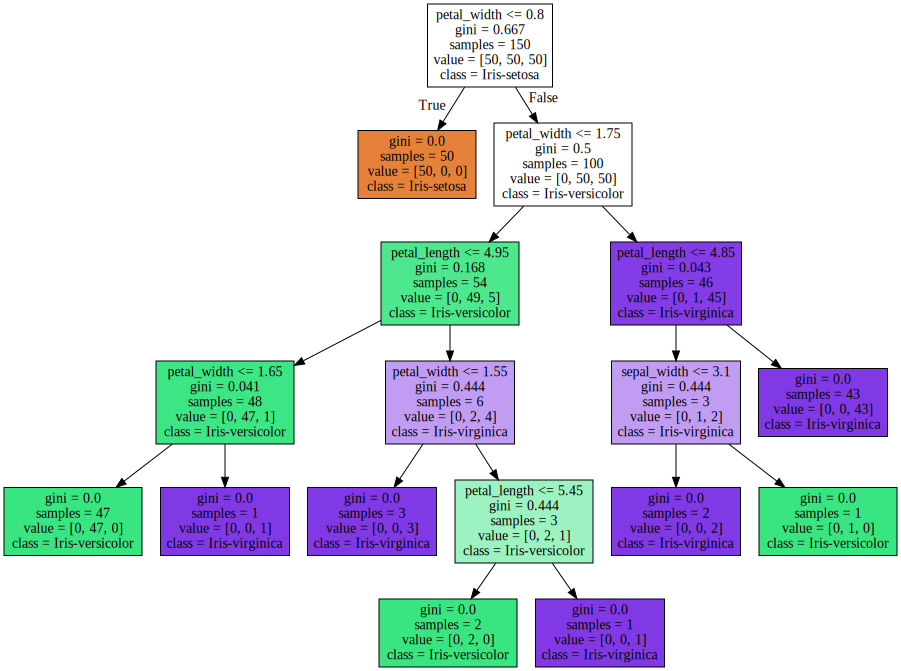

In [28]:
with open('Arbol.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [29]:
import pydot

(graph,) = pydot.graph_from_dot_file('Arbol.dot')

graph.write_png('Arbol.png')

In [30]:
arbol.feature_importances_

array([0.        , 0.01333333, 0.06405596, 0.92261071])

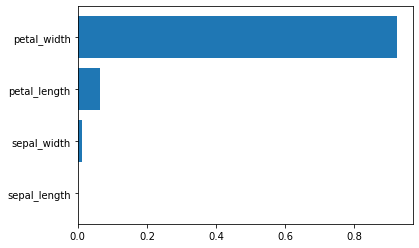

In [35]:
import matplotlib.pyplot as plt

plt.barh(range(len(df.columns[:-1])), arbol.feature_importances_)
plt.yticks(np.arange(len(df.columns[:-1])), df.columns[:-1])
plt.show()

In [34]:
%matplotlib inline

# Bosque Aleatorio

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
forest = RandomForestClassifier(random_state=1234, n_jobs = -1)

In [46]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [47]:
y_pred2 = forest.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred2)

0.9555555555555556

In [42]:
confusion_matrix(y_test, y_pred2)

array([[16,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 11]], dtype=int64)

In [49]:
forest.score(X_train,y_train)

1.0

# Bagging

In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [64]:
df['class'] = df['class'].astype('category')
df['class_code'] = df['class'].cat.codes

In [66]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,class_code
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [67]:
Y = df['class_code']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [74]:
bag = BaggingClassifier(base_estimator=SVC())

In [75]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [76]:
y_pred3 = bag.predict(X_test)

In [77]:
accuracy_score(y_test, y_pred3)

0.9777777777777777

In [78]:
confusion_matrix(y_test, y_pred3)

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 19]], dtype=int64)